## Import Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load CSV Dataset

### Train Data

#### Import Train CSV

In [43]:
train_data = pd.read_csv('datasets/titanic_survival_dataset/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Exploratory Data Analysis

In [45]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

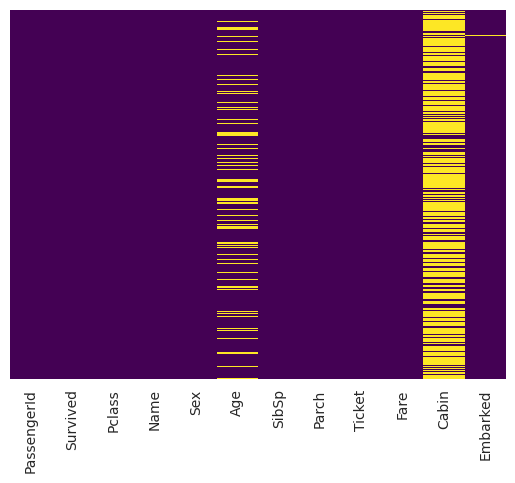

In [46]:
sns.heatmap(train_data.isnull(), yticklabels=False, cmap='viridis', cbar=False)

<AxesSubplot: xlabel='Survived', ylabel='count'>

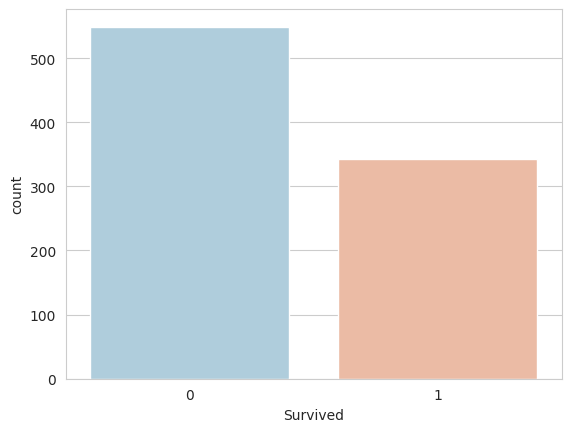

In [47]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train_data, palette="RdBu_r")

<AxesSubplot: xlabel='Sex', ylabel='count'>

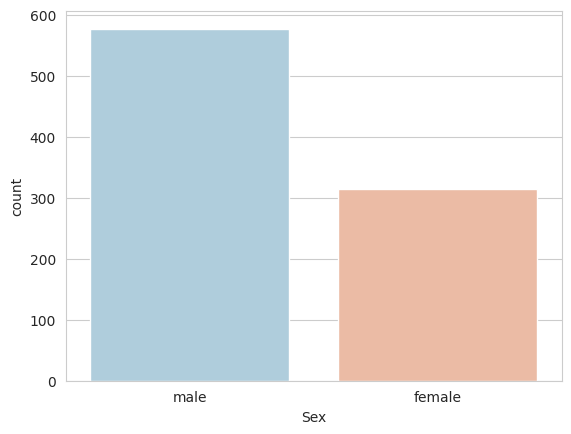

In [48]:
sns.set_style("whitegrid")
sns.countplot(x="Sex", data=train_data, palette="RdBu_r")

<AxesSubplot: xlabel='Survived', ylabel='count'>

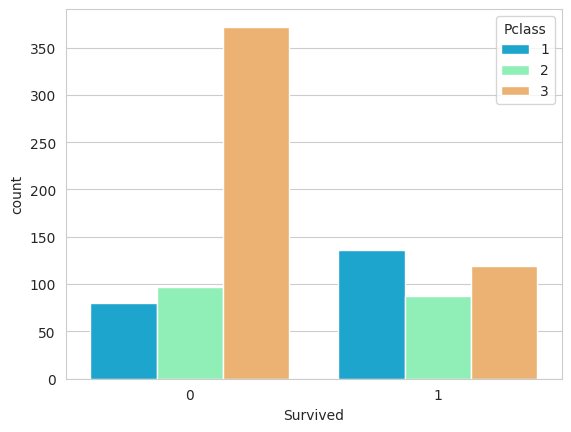

In [49]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", hue="Pclass", data=train_data, palette="rainbow")

<AxesSubplot: >

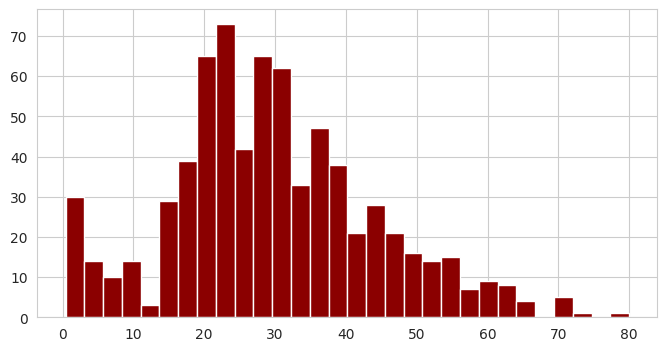

In [50]:
train_data["Age"].hist(bins=30, color="darkred", figsize=(8, 4))

<AxesSubplot: >

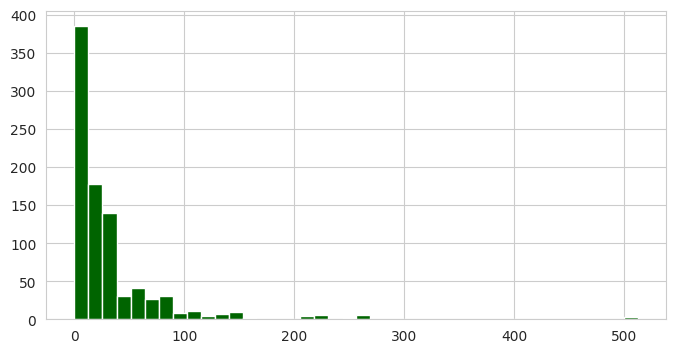

In [51]:
train_data["Fare"].hist(bins=40, color="darkgreen", figsize=(8, 4))

/tmp/ipykernel_16210/1460146067.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr())


<AxesSubplot: >

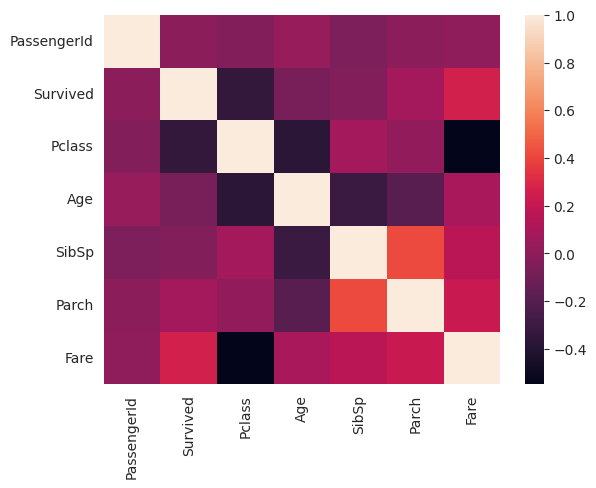

In [52]:
sns.heatmap(train_data.corr())

#### Data Cleaning

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

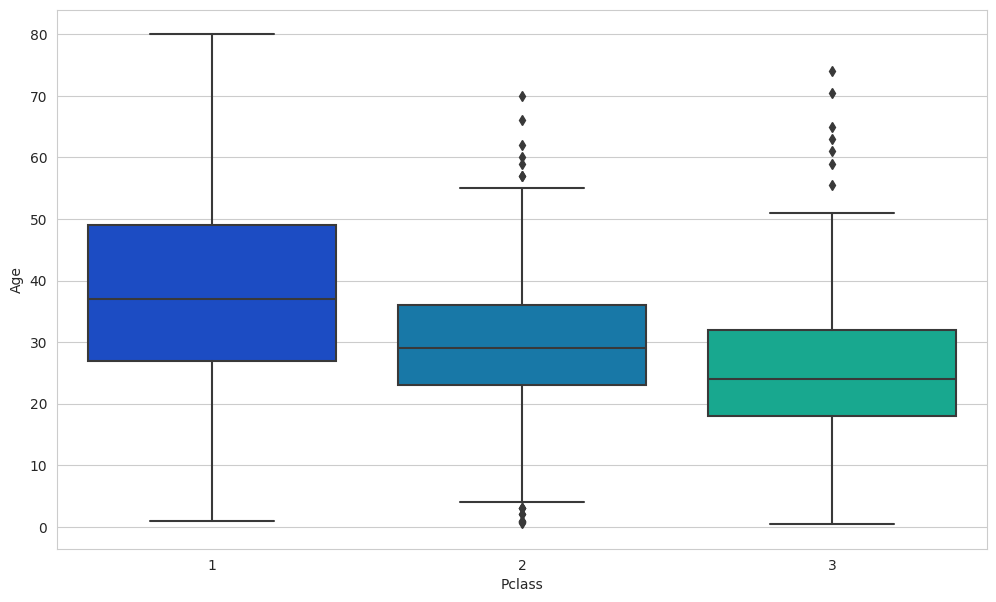

In [53]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=train_data, x="Pclass", y="Age", palette="winter")

In [54]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age): 
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [55]:
train_data['Age'] = train_data[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot: >

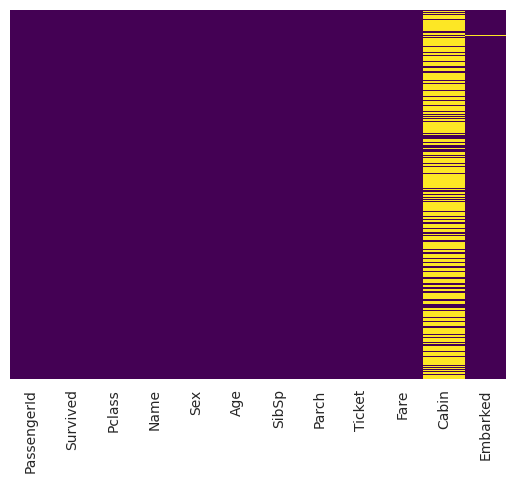

In [56]:
sns.heatmap(train_data.isnull(), yticklabels=False, cmap='viridis', cbar=False)

In [57]:
train_data.drop("Cabin", inplace=True, axis=1)

In [58]:
train_data.shape

(891, 11)

In [59]:
# Convert categorical features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [60]:
Sex = pd.get_dummies(train_data['Sex'], drop_first=True)
Embarked = pd.get_dummies(train_data['Embarked'], drop_first=True)

In [61]:
Sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [62]:
Embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [63]:
train_data.drop(['Sex', 'Name', 'Embarked', 'Ticket'], inplace=True, axis=1)

In [64]:
train_data = pd.concat([train_data, Sex, Embarked], axis=1)

In [65]:
train_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [66]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   male         891 non-null    uint8  
 8   Q            891 non-null    uint8  
 9   S            891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


#### Test train split

In [67]:
y = train_data["Survived"]
X = train_data.drop(["Survived"], axis=1)

In [68]:
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1,0,1
887,888,1,19.0,0,0,30.0000,0,0,1
888,889,3,24.0,1,2,23.4500,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0


In [69]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [71]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
733,734,2,23.0,0,0,13.0000,1,0,1
857,858,1,51.0,0,0,26.5500,1,0,1
81,82,3,29.0,0,0,9.5000,1,0,1
319,320,1,40.0,1,1,134.5000,0,0,0
720,721,2,6.0,0,1,33.0000,0,0,1
...,...,...,...,...,...,...,...,...,...
575,576,3,19.0,0,0,14.5000,1,0,1
838,839,3,32.0,0,0,56.4958,1,0,1
337,338,1,41.0,0,0,134.5000,0,0,0
523,524,1,44.0,0,1,57.9792,0,0,0


## Train logistic regression model

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
model = LogisticRegression()

In [74]:
model.fit(X_train, y_train)

/home/xd/Desktop/haroon-codedistrict/Learning/ML-Leaning/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
predictions = model.predict(X_test)

## Evaluation

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        99
           1       0.83      0.65      0.73        80

    accuracy                           0.78       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



## Submission

In [78]:
preds = model.predict(X)

In [79]:
X.shape

(891, 9)

In [80]:
submission = pd.DataFrame({
    'PassenerId': X['PassengerId'], 'Survived': preds,
})

In [81]:
# submission.to_csv('submission.csv')